<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


In this lab, I will work with a cleaned dataset to perform exploratory data analysis (EDA). I will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, I will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [27]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Load the cleaned dataset from the previous lab. This dataset has some extra columns that we might use to do analysis. 
df_cleaned = pd.read_csv('cleaned_data_Lab13.csv')

# Display the first few rows to understand the structure of the dataset
df_cleaned.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange,EmploymentCategory,Region
0,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,Appropriate in length,Easy,66850.0,8.0,10-20,Full-time,Europe
1,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,7.0,0.0,0.0,Appropriate in length,Easy,66850.0,8.0,20+,Full-time,Europe
2,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,7.0,0.0,0.0,Too long,Neither easy nor difficult,66850.0,8.0,5-10,Full-time,North America
3,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,7.0,0.0,0.0,Too long,Easy,66850.0,8.0,10-20,Self-employed,Europe
4,12,I am a developer by profession,45-54 years old,"Employed, full-time",In-person,Apples,Hobby;School or academic work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Books / Physical media;School (i.e., Universit...",Technical documentation;Blogs;Written Tutorial...,...,7.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,66850.0,8.0,20+,Full-time,Europe


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


Number of responses with ConvertedCompYearly: 23435


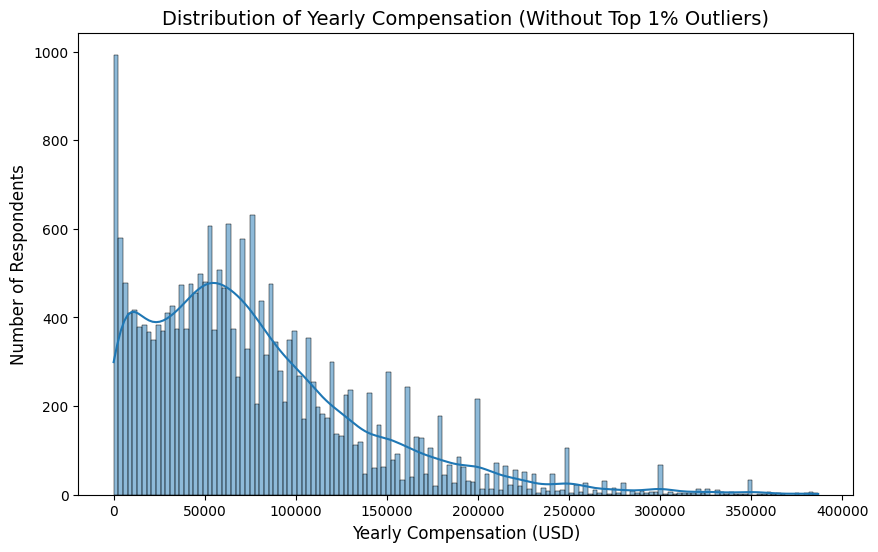

In [38]:
# Show full numbers in outputs
pd.options.display.float_format = '{:,.2f}'.format

count_comp = df['ConvertedCompYearly'].count()
print(f"Number of responses with ConvertedCompYearly: {count_comp}")

# Prepare data
comp = df['ConvertedCompYearly'].dropna()
upper_limit = comp.quantile(0.99)   # remove top 1% outliers
comp = comp[comp <= upper_limit]

# Plot the histogram and KDE distribution
plt.figure(figsize=(10, 6))
sns.histplot(comp, bins=150, kde=True)
plt.title('Distribution of Yearly Compensation (Without Top 1% Outliers)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')  # Show full numbers

plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [13]:
# Filter data for full-time employees
full_time = df[df['Employment'] == 'Employed, full-time']

# Number of full-time respondents
num_full_time = full_time.shape[0]  # or len(full_time)
print(f"Number of Full-Time Respondents: {num_full_time}")

# Calculate the median yearly compensation
median_comp_full_time = full_time['ConvertedCompYearly'].median()

print(f"Median Yearly Compensation for Full-Time Employees: ${median_comp_full_time:,.2f}")


Number of Full-Time Respondents: 39041
Median Yearly Compensation for Full-Time Employees: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



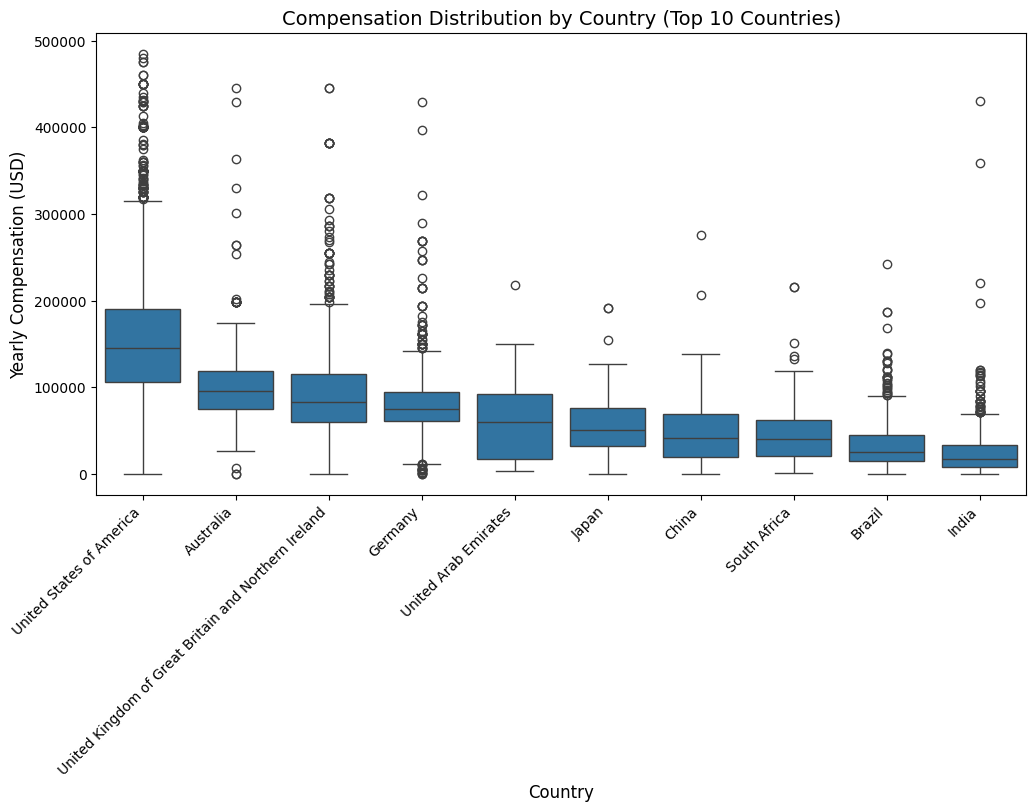

In [20]:
# List unique countries
# Cant analyze all the countries so I will do a sample of 10 key countries to get insights on global trends. 
# sorted([c for c in df['Country'].unique() if isinstance(c, str)])

# List of key countries to analyze
key_countries = [
    'United States of America', 'United Kingdom of Great Britain and Northern Ireland',
    'Australia', 'Brazil', 'South Africa', 'China', 'Germany',
    'India', 'Japan', 'United Arab Emirates'
]

# Filter dataset for full-time employees in these countries
df_sample = df[
    (df['Employment'] == 'Employed, full-time') & 
    (df['Country'].isin(key_countries))
]

# Optional: Remove extreme outliers (top 1%) for readability
upper_limit = df_sample['ConvertedCompYearly'].quantile(0.99)
df_sample = df_sample[df_sample['ConvertedCompYearly'] <= upper_limit]


# Compute median compensation per country and sort descending
median_order = df_sample.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False).index

# Create boxplot sorted by median
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_sample, 
    x='Country', 
    y='ConvertedCompYearly', 
    order=median_order,
    showfliers=True
)

plt.title('Compensation Distribution by Country (Top 10 Countries)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.ticklabel_format(style='plain', axis='y')  # Full numbers, no scientific notation
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [41]:
# Make a copy of the original dataset
df_no_outliers = df.copy()

# Drop NaNs temporarily to calculate IQR
comp_data = df_no_outliers['ConvertedCompYearly'].dropna()

# Calculate Q1, Q3, and IQR
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers
df_no_outliers = df_no_outliers[
    (df_no_outliers['ConvertedCompYearly'] >= lower_bound) & 
    (df_no_outliers['ConvertedCompYearly'] <= upper_bound)
]

# Check new dataset shape
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")


Original dataset shape: (65437, 114)
Dataset shape after removing outliers: (22457, 114)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly  WorkExp  JobSatPoints_1
ConvertedCompYearly                 1.00     0.41           -0.06
WorkExp                             0.41     1.00           -0.03
JobSatPoints_1                     -0.06    -0.03            1.00


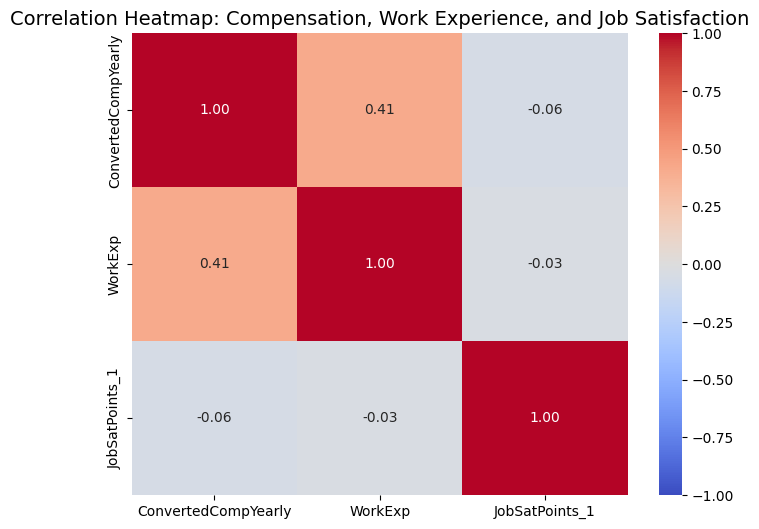

In [42]:
# Select relevant columns
corr_df = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]

# Check for missing values and drop rows with NaNs in these columns
corr_df = corr_df.dropna()

# Calculate correlation matrix
corr_matrix = corr_df.corr()  # Pearson correlation by default

print("Correlation Matrix:")
print(corr_matrix)

# Visualize correlations with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,         # show correlation values
    cmap='coolwarm',    # color map
    vmin=-1, vmax=1,    # set scale from -1 to 1
    fmt=".2f"           # two decimal points
)
plt.title('Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction', fontsize=14)
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


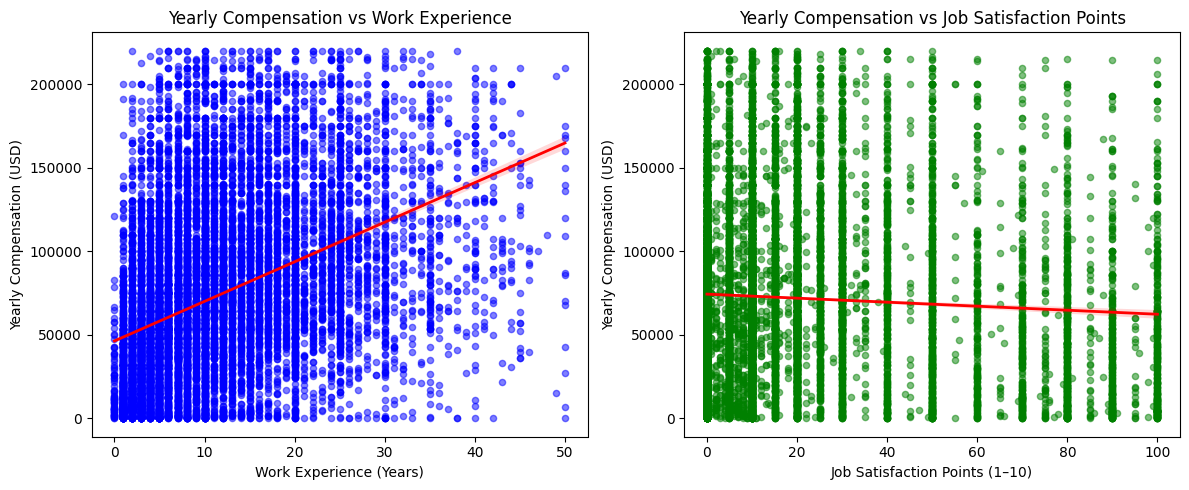

In [43]:
# Use cleaned dataset without outliers
df_plot = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

plt.figure(figsize=(12, 5))

# Scatter + Regression: Compensation vs Work Experience
plt.subplot(1, 2, 1)
sns.regplot(
    data=df_plot,
    x='WorkExp',
    y='ConvertedCompYearly',
    scatter_kws={'s': 20, 'alpha': 0.5, 'color': 'blue'},  # smaller, more transparent, colored points
    line_kws={'color':'red', 'linewidth':2}  # thicker regression line
)
plt.title('Yearly Compensation vs Work Experience', fontsize=12)
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD)')

# Scatter + Regression: Compensation vs Job Satisfaction
plt.subplot(1, 2, 2)
sns.regplot(
    data=df_plot,
    x='JobSatPoints_1',
    y='ConvertedCompYearly',
    scatter_kws={'s': 20, 'alpha': 0.5, 'color': 'green'},  # smaller, semi-transparent, colored points
    line_kws={'color':'red', 'linewidth':2}
)
plt.title('Yearly Compensation vs Job Satisfaction Points', fontsize=12)
plt.xlabel('Job Satisfaction Points (1–10)')
plt.ylabel('Yearly Compensation (USD)')

plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, I practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, I have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
